# Handling Missing Data on Titanic Dataset

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
import pandas as pd

In [3]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
data.isnull().sum()  ## Checking missing value

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
'''Handling Missing value - 
1. Delete the row/column whose contains the missing data(df.dropna())
2. Compute mean,meadian, mode'''

'Handling Missing value - \n1. Delete the row/column whose contains the missing data(df.dropna())\n2. Compute mean,meadian, mode'

### Mean value imputation

In [7]:
data['age_mean']=data['age'].fillna(data['age'].mean())

In [8]:
data[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


### Median Value imputation

<Axes: xlabel='age'>

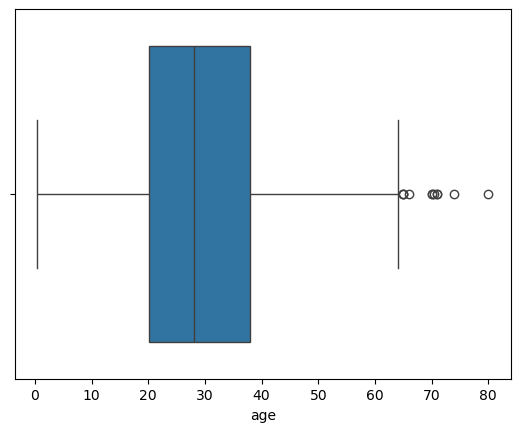

In [9]:
sns.boxplot(x=data['age'])

In [10]:
data['age_median'] = data['age'].fillna(data['age'].median())
data[['age_median','age_mean','age']]

,age_median,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


### Mode Imputation

#### For Embarked

In [11]:
data[data['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [12]:
data['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
mode = data[data['embarked'].notna()]['embarked'].mode()[0]

In [14]:
data['embarked_mode']=data['embarked'].fillna(mode)
data['embarked_mode'].isnull().sum()

0

#### For Embark Town

In [15]:
data['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [16]:
mode = data[data['embark_town'].notna()]['embark_town'].mode()[0]

In [17]:
data['embark_town_mode'] = data['embark_town'].fillna(mode)
data['embark_town_mode'].isnull().sum()

0

#### For Deck

In [18]:
data['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
mode = data[data['deck'].notna()]['deck'].mode()[0]

In [20]:
data['deck_mode']=data['deck'].fillna(mode)
data['deck_mode'].isnull().sum()

0

In [21]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embarked_mode,embark_town_mode,deck_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0,S,Southampton,C
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0,C,Cherbourg,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0,S,Southampton,C
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0,S,Southampton,C
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0,S,Southampton,C


In [22]:
data.drop(['embarked','embark_town','deck','age'],axis=1,inplace=True)

In [23]:
data.isnull().sum()

survived            0
pclass              0
sex                 0
sibsp               0
parch               0
fare                0
class               0
who                 0
adult_male          0
alive               0
alone               0
age_mean            0
age_median          0
embarked_mode       0
embark_town_mode    0
deck_mode           0
dtype: int64

<Axes: xlabel='sex', ylabel='Count'>

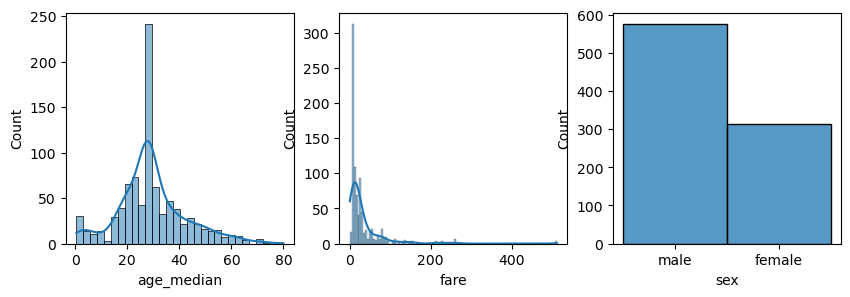

In [24]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
sns.histplot(data['age_median'],kde=True)

plt.subplot(1,3,2)
sns.histplot(data['fare'],kde=True)

plt.subplot(1,3,3)
sns.histplot(data['sex'],kde=False)

In [25]:
data['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

#### Upsampling on the basis of sex

In [26]:
data_male = data[data['sex']=='male']
data_female = data[data['sex']=='female']

In [27]:
data_female_upsample = resample(data_female,replace=True,n_samples=len(data_male),random_state=23)

In [28]:
data_upsampled = pd.concat([data_male,data_female_upsample])
data_upsampled['sex'].value_counts()

sex
male      577
female    577
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='Count'>

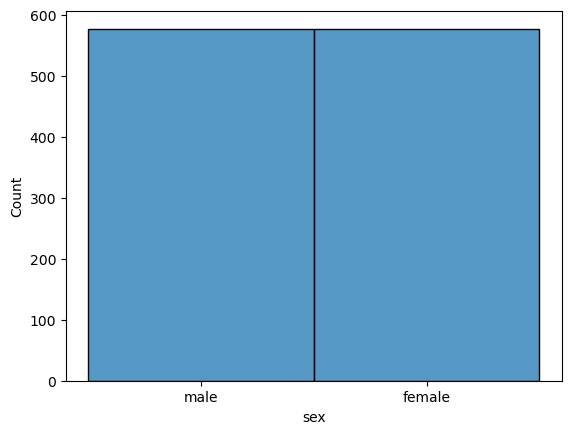

In [29]:
sns.histplot(data_upsampled['sex'])

### SMOTE Upsampling

In [30]:
data['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversampling = SMOTE()
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data_encode = label.fit_transform(data['sex'])
# data_oversampled = oversampling.fit_resample(data_encode['embarked'],data_encode['sex'])

In [42]:
data_sex = pd.DataFrame(data_encode,columns=['sex_1'])
data_sex.head()

,sex_1
0,1
1,0
2,0
3,0
4,1


In [44]:
data_final = pd.concat([data,data_sex],axis=1)
# data_final.head()
data_final.drop(['sex'],axis=1,inplace=True)
data_final.head()

,survived,pclass,sibsp,parch,fare,class,who,adult_male,alive,alone,age_mean,age_median,embarked_mode,embark_town_mode,deck_mode,sex_1
0,0,3,1,0,7.2500,Third,man,True,no,False,22.0,22.0,S,Southampton,C,1
1,1,1,1,0,71.2833,First,woman,False,yes,False,38.0,38.0,C,Cherbourg,C,0
2,1,3,0,0,7.9250,Third,woman,False,yes,True,26.0,26.0,S,Southampton,C,0
3,1,1,1,0,53.1000,First,woman,False,yes,False,35.0,35.0,S,Southampton,C,0
4,0,3,0,0,8.0500,Third,man,True,no,True,35.0,35.0,S,Southampton,C,1


In [52]:
data_oversampled = oversampling.fit_resample(data_final[['fare']],data_encode['sex_1'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices